In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix


# If you have these qualifications, is it more worth to further education or more experience for each level?

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [3]:
print(data['company'].value_counts())
amazon = data[data['company'] == 'Amazon']

Amazon                                     8126
Microsoft                                  5216
Google                                     4330
Facebook                                   2990
Apple                                      2028
Oracle                                     1128
Salesforce                                 1056
Intel                                       949
IBM                                         907
Cisco                                       907
Uber                                        880
Capital One                                 778
LinkedIn                                    701
VMware                                      657
Qualcomm                                    565
JPMorgan Chase                              541
Bloomberg                                   537
Goldman Sachs                               469
Intuit                                      449
PayPal                                      426
Deloitte                                

In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8126 entries, 2 to 62634
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                8126 non-null   object 
 1   company                  8126 non-null   object 
 2   level                    8126 non-null   object 
 3   title                    8126 non-null   object 
 4   totalyearlycompensation  8126 non-null   int64  
 5   location                 8126 non-null   object 
 6   yearsofexperience        8126 non-null   float64
 7   yearsatcompany           8126 non-null   float64
 8   tag                      7948 non-null   object 
 9   basesalary               8126 non-null   float64
 10  stockgrantvalue          8126 non-null   float64
 11  bonus                    8126 non-null   float64
 12  gender                   5525 non-null   object 
 13  otherdetails             4905 non-null   object 
 14  cityid                 

In [5]:
amazon['level'].value_counts()

L5                                     2602
L6                                     1755
L4                                     1645
L7                                      473
SDE I                                   418
SDE II                                  398
L6 SDM                                  283
SDE III                                  93
6                                        45
L3                                       42
L5 SDM                                   41
5                                        38
L8                                       25
Senior SDE                               23
7                                        21
4                                        17
Senior Product Manager                   16
l5                                        9
SDE 2                                     9
L1                                        9
Principal SDE                             8
l4                                        8
L2                              

In [6]:
amazon = amazon.replace({'level':{'SDE I':'L4','SDE II':'L5','SDE III':'L6','L6 SDM':'L6','6':'L6','L5 SDM':'L5','Principal SDE':'L7','Senior SDE':'L6','5':'L5','7':'L7','4':'L4','1':'L1','l5':'L5','l4':'L4','l6':'L6','l7':'L7','l1':'L1','l2':'L2','l3':'L3','2':'L2','3':'L3'}})
amazon['level'].value_counts()

L5                                     3088
L6                                     2203
L4                                     2088
L7                                      504
L3                                       46
L8                                       25
Senior Product Manager                   16
L2                                       12
L1                                       11
SDE 2                                     9
SDE2                                      6
IC6                                       6
IC5                                       5
IC7                                       5
Senior SDM                                4
Software Dev Manager                      3
L6 Manager                                3
SDE 3                                     3
SDEIII                                    3
L10                                       3
Product Manager                           3
SDE1                                      3
8                               

In [7]:
cleaned = amazon.loc[(amazon['level'] == 'L1') | (amazon['level']=='L2') | (amazon['level']=='L3') | (amazon['level']=='L4') | (amazon['level']=='L5') | (amazon['level']=='L6') | (amazon['level']=='L7') | (amazon['level']=='L8')]


In [8]:
cleaned['level'].value_counts()
cleaned.info()
cleaned["Education"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7977 entries, 2 to 62634
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                7977 non-null   object 
 1   company                  7977 non-null   object 
 2   level                    7977 non-null   object 
 3   title                    7977 non-null   object 
 4   totalyearlycompensation  7977 non-null   int64  
 5   location                 7977 non-null   object 
 6   yearsofexperience        7977 non-null   float64
 7   yearsatcompany           7977 non-null   float64
 8   tag                      7813 non-null   object 
 9   basesalary               7977 non-null   float64
 10  stockgrantvalue          7977 non-null   float64
 11  bonus                    7977 non-null   float64
 12  gender                   5433 non-null   object 
 13  otherdetails             4841 non-null   object 
 14  cityid                 

Master's Degree      2049
Bachelor's Degree    1351
PhD                   155
Highschool             35
Some College           28
Name: Education, dtype: int64

In [9]:
cleaned = cleaned.sort_values(by=['level','totalyearlycompensation'], ascending=[False,False])

In [10]:
cleaned.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
61986,5/14/2021 13:30:43,Amazon,L8,Software Engineering Manager,1660000,"Seattle, WA",15.0,15.0,iOS,160000.0,1500.0,0.0,Male,"Title: Director / Gm, Race: Asian",11527,819.0,69870,0,0,0,0,0,1,0,0,0,0,Asian,NaN
61960,5/11/2019 5:16:48,Amazon,L8,Software Engineering Manager,1400000,"Seattle, WA",30.0,10.0,Distributed Systems (Back-End),160000.0,1200.0,0.0,Male,NaN,11527,819.0,8612,0,0,0,0,0,0,0,0,0,0,NaN,NaN
32237,10/8/2020 22:11:19,Amazon,L8,Software Engineering Manager,1160000,"Seattle, WA",20.0,7.0,Full Stack,160000.0,1000000.0,0.0,NaN,"Title: Director Software Develop,wmr",11527,819.0,44454,0,0,0,0,0,0,0,0,0,0,NaN,NaN
36276,11/30/2020 14:25:44,Amazon,L8,Software Engineering Manager,1000000,"New York, NY",20.0,11.0,Distributed Systems (Back-End),160000.0,840000.0,0.0,Male,"Title: Director, Sdm, Race: White, Academic Le...",10182,501.0,49918,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
60576,8/6/2021 22:06:20,Amazon,L8,Software Engineering Manager,980000,"Seattle, WA",18.0,9.0,Web Development (Front-End),380000.0,510000.0,90000.0,Male,"Title: Software Engineer, Race: Asian, Academi...",11527,819.0,82082,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7977 entries, 61986 to 36496
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                7977 non-null   object 
 1   company                  7977 non-null   object 
 2   level                    7977 non-null   object 
 3   title                    7977 non-null   object 
 4   totalyearlycompensation  7977 non-null   int64  
 5   location                 7977 non-null   object 
 6   yearsofexperience        7977 non-null   float64
 7   yearsatcompany           7977 non-null   float64
 8   tag                      7813 non-null   object 
 9   basesalary               7977 non-null   float64
 10  stockgrantvalue          7977 non-null   float64
 11  bonus                    7977 non-null   float64
 12  gender                   5433 non-null   object 
 13  otherdetails             4841 non-null   object 
 14  cityid             

<AxesSubplot:>

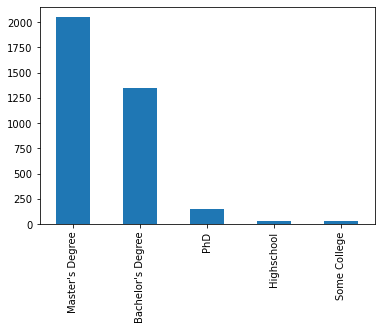

In [11]:
cleaned['Education'].value_counts()
cleaned.info()
cleaned['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

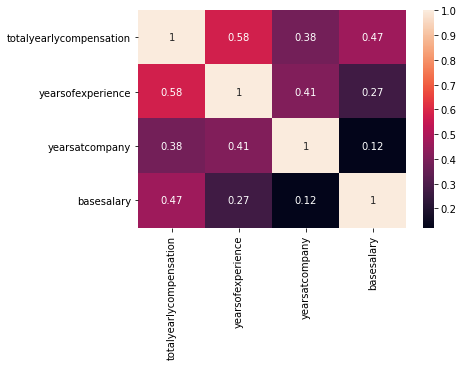

In [12]:
testerdf=cleaned[['totalyearlycompensation','yearsofexperience','yearsatcompany','basesalary']]
sb.heatmap(testerdf.corr(),annot=True)

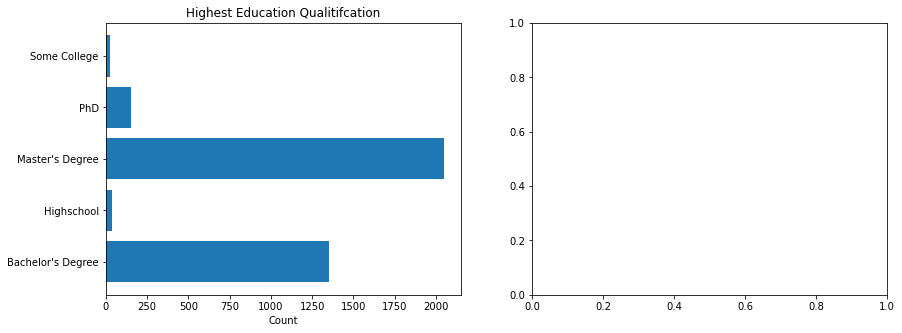

In [13]:
EduCount= cleaned["Education"].value_counts()
s= EduCount.sort_index()
fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].set_title ("Highest Education Qualitifcation")
axes[0].set_xlabel("Count")
axes[0].barh(s.index, s.values)
plt.show()


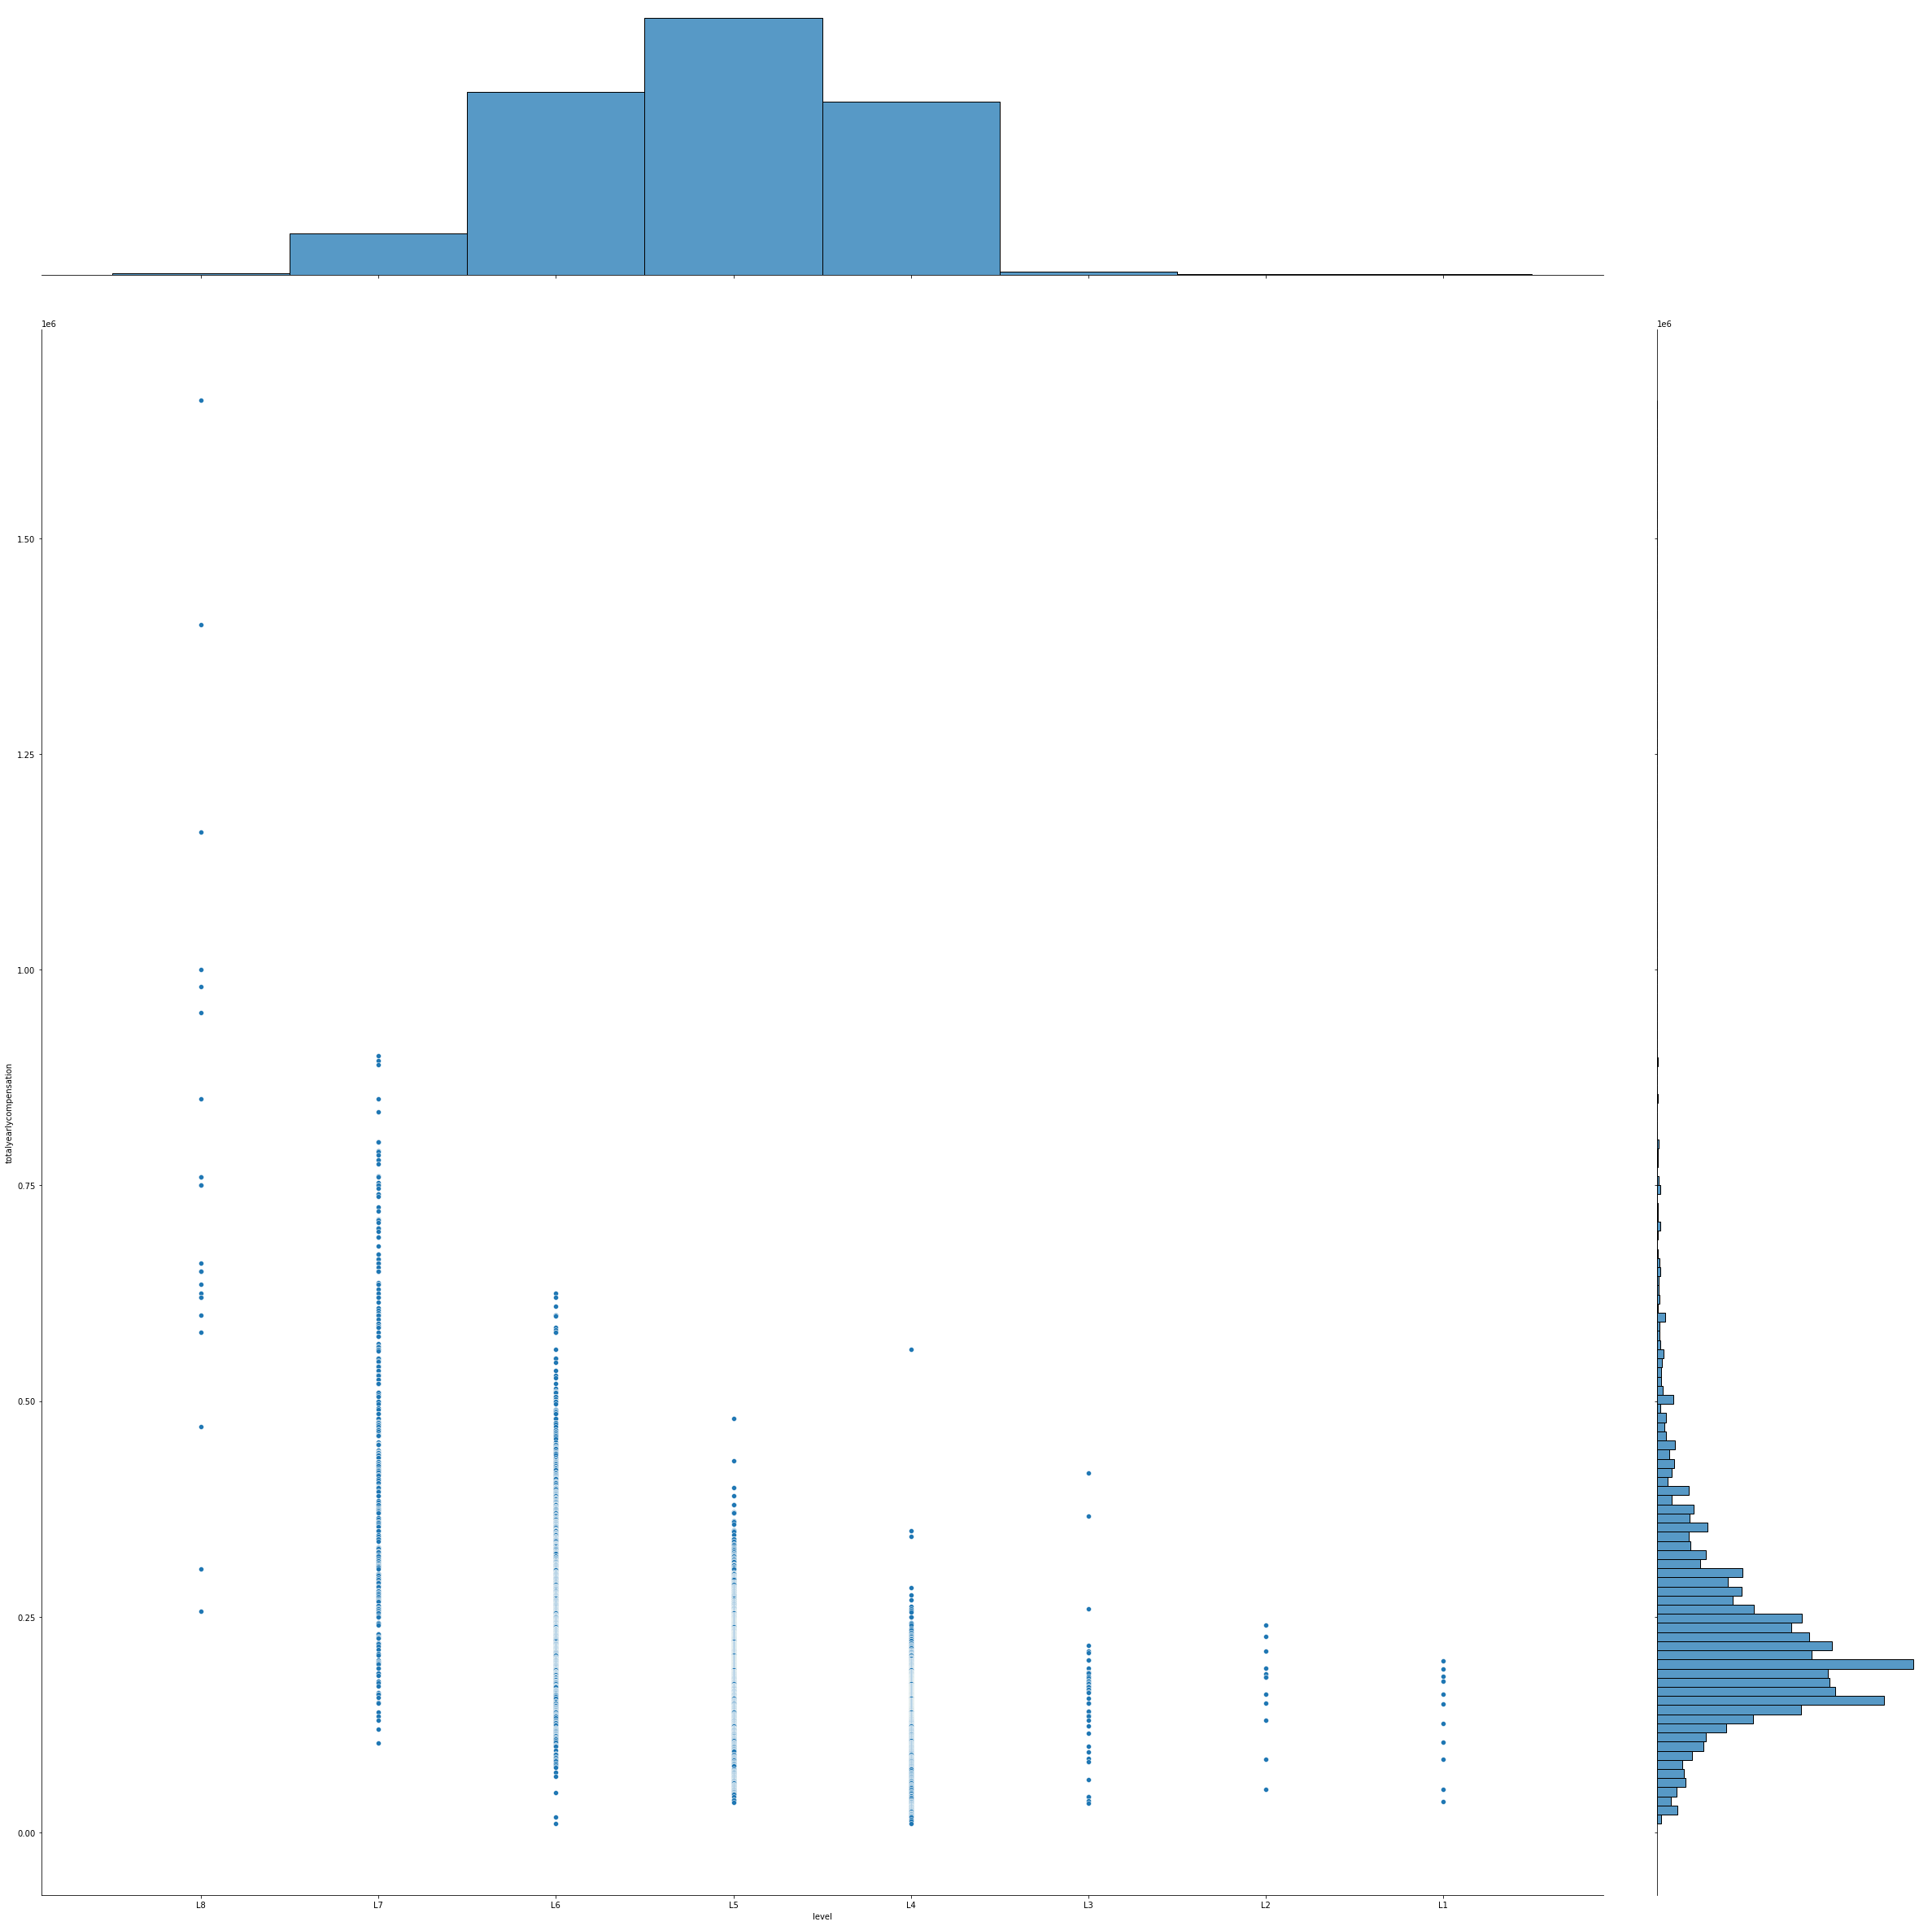

In [14]:
ComData = pd.DataFrame(cleaned[["level", "totalyearlycompensation"]])
sb.jointplot(data=ComData, x="level",y="totalyearlycompensation",height=33)

2